In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import seaborn as sns

In [2]:
sample_test = pd.read_csv('/kaggle/input/amazon-ml-challenge/student_resource 3/dataset/sample_test.csv')
print('-----------')
sample_test.info()
print('-----------')
sample_test.isnull().sum()
sample_test.head(5)

-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        88 non-null     int64 
 1   image_link   88 non-null     object
 2   group_id     88 non-null     int64 
 3   entity_name  88 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.9+ KB
-----------


,index,image_link,group_id,entity_name
0,0,https://m.media-amazon.com/images/I/41-NCxNuBx...,658003,width
1,1,https://m.media-amazon.com/images/I/41-NCxNuBx...,658003,depth
2,2,https://m.media-amazon.com/images/I/417NJrPEk+...,939426,maximum_weight_recommendation
3,3,https://m.media-amazon.com/images/I/417SThj+Sr...,276700,voltage
4,4,https://m.media-amazon.com/images/I/417SThj+Sr...,276700,wattage


In [3]:
train = pd.read_csv('/kaggle/input/amazon-ml-challenge/student_resource 3/dataset/train.csv')
print('-----------')
train.info()
print('-----------')
train.isnull().sum()
train.head(5)

-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263859 entries, 0 to 263858
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   image_link    263859 non-null  object
 1   group_id      263859 non-null  int64 
 2   entity_name   263859 non-null  object
 3   entity_value  263859 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.1+ MB
-----------


,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram


In [4]:
df = train

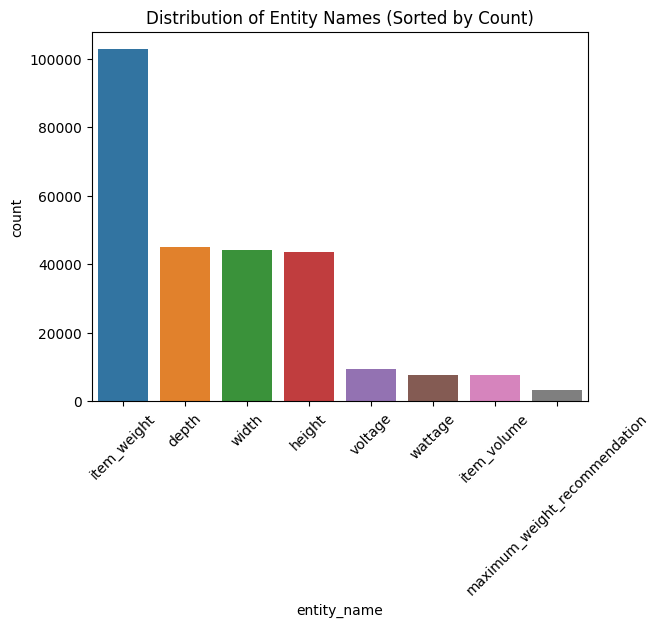

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# entity_nameのカウントを取得し、大きい順にソート
entity_counts = df['entity_name'].value_counts().reset_index()
entity_counts.columns = ['entity_name', 'count']

# カウントを大きい順に並べてプロット
sns.barplot(x='entity_name', y='count', data=entity_counts, order=entity_counts['entity_name'])
plt.title('Distribution of Entity Names (Sorted by Count)')
plt.xticks(rotation=45)
plt.show()

In [6]:
df = sample_test

/tmp/ipykernel_17/800138063.py:17: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/800138063.py:17: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/800138063.py:17: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/800138063.py:17: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/800138063.py:17: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/800138063.py:17: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/800138063.py:17: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/800138063.py:17: Us

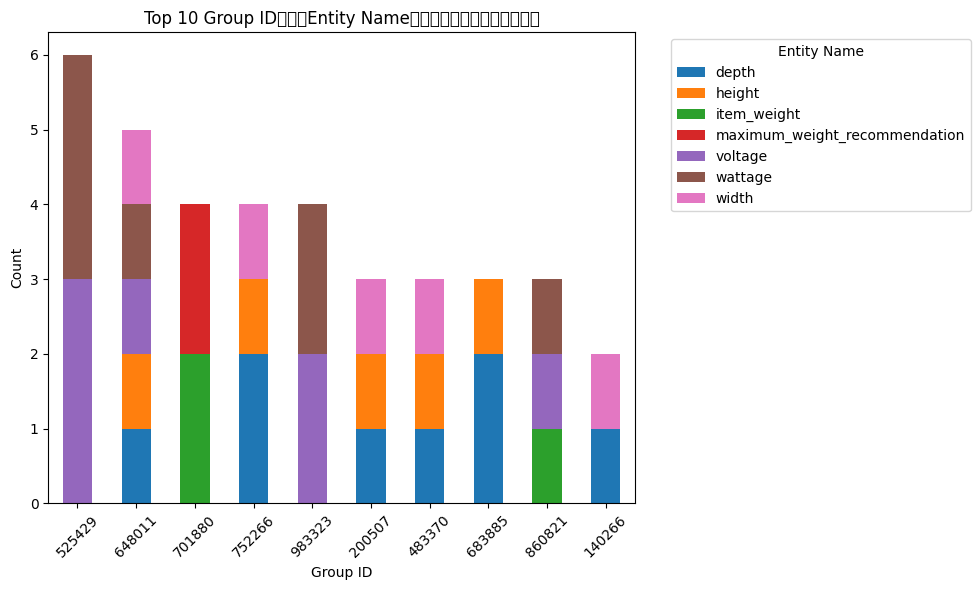

In [7]:
# group_idごとにentity_nameのカウントを取得
group_entity_counts = df.groupby(['group_id', 'entity_name']).size().unstack(fill_value=0)

# 上位N個のgroup_idを抽出（例として3つ）
top_n_groups = group_entity_counts.sum(axis=1).nlargest(10).index
group_entity_counts_top_n = group_entity_counts.loc[top_n_groups]

# 積み上げ棒グラフを描画
group_entity_counts_top_n.plot(kind='bar', stacked=True, figsize=(10, 6))

# グラフの詳細設定
plt.title('Top 10 Group IDごとのEntity Nameの分布（積み上げ棒グラフ）')
plt.xlabel('Group ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Entity Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# グラフの表示
plt.show()